In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Se cargan las diferentes dependencias necesarias
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import librosa
import os

from IPython import display

In [ ]:
# Configuraciones iniciales
directory = "/content/gdrive/MyDrive/numbers_dataset/training/"
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

# Tamaño de las características MFCC + delta + delta2
feature_size = 40 + 40 + 40  # MFCC + Delta + Delta2
Datos = np.zeros((cantidadFiles, feature_size))

for i, file in enumerate(files):
    # Cargar archivo
    file_name = os.path.join(directory, file)
    x, Fs = librosa.load(file_name, mono=True, sr=16000)

    # Calcular MFCC
    mfccs = librosa.feature.mfcc(y=np.float32(x), sr=Fs, n_fft=512, hop_length=256, n_mfcc=40)
    mfccs_sc = np.mean(mfccs.T, axis=0)

    # Calcular derivadas primera y segunda
    mfcc_delta = librosa.feature.delta(mfccs_sc)
    mfcc_delta2 = librosa.feature.delta(mfccs_sc, order=2)

    # Consolidar características
    Datos[i] = np.hstack((mfccs_sc, mfcc_delta, mfcc_delta2))

Xtrain = Datos
print(Xtrain.shape)

(199, 120)


In [ ]:
#cinco: 39
#cuatro: 43 = 82
#dos: 37 = 119
#tres: 39 = 158
#uno: 41 = 199
#Total: 199

YtrainIni=np.zeros((199,1))
for i in range(39):
    YtrainIni[i]=4

for i in range(39,82):
    YtrainIni[i]=3

for i in range(82,119):
    YtrainIni[i]=1

for i in range(119,158):
    YtrainIni[i]=2

for i in range(158,199):
    YtrainIni[i]=0

print(YtrainIni)

[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [ ]:
Ytrain = keras.utils.to_categorical(YtrainIni)
print(Ytrain)

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               30976     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

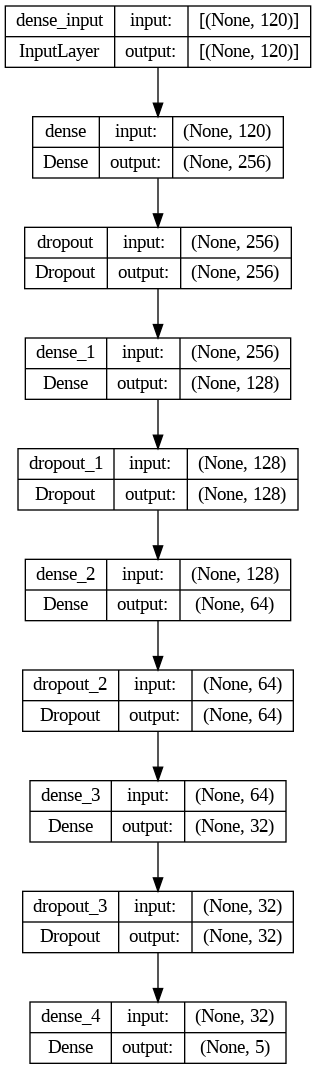

In [ ]:
from tensorflow.keras.regularizers import l2

# Inicializamos el modelo
model_MFCC = tf.keras.Sequential()

# Primera capa oculta con 256 neuronas
model_MFCC.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=l2(0.0001), input_shape=(120,)))
model_MFCC.add(tf.keras.layers.Dropout(0.2))

# Segunda capa oculta con 128 neuronas
model_MFCC.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.0001)))
model_MFCC.add(tf.keras.layers.Dropout(0.2))

# Tercera capa oculta con 64 neuronas
model_MFCC.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
model_MFCC.add(tf.keras.layers.Dropout(0.2))

# Cuarta capa oculta con 32 neuronas
model_MFCC.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))
model_MFCC.add(tf.keras.layers.Dropout(0.2))

# Capa de salida con 5 neuronas (por las 5 categorías)
model_MFCC.add(tf.keras.layers.Dense(5, activation='softmax'))

# Mostramos un resumen del modelo
model_MFCC.summary()

# Opcional: Si quieres visualizar el modelo en una imagen
keras.utils.plot_model(model_MFCC, to_file='model_MFCC_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
# Compilamos el modelo
model_MFCC.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Inicializar el callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100, verbose=1, restore_best_weights=True)

# Entrenamiento del modelo
history = model_MFCC.fit(Xtrain, Ytrain, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Si estás usando validation_split:
loss, acc = history.history['val_loss'][-1], history.history['val_accuracy'][-1]

print('loss: {0} - Accuracy: {1}'.format(loss, acc))


Epoch 1/100
5/5 [==============================] - 1s 56ms/step - loss: 22.0362 - accuracy: 0.2579 - val_loss: 21.9929 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 13.8303 - accuracy: 0.2327 - val_loss: 2.8786 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 13ms/step - loss: 7.7717 - accuracy: 0.2327 - val_loss: 6.0283 - val_accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 7.8177 - accuracy: 0.2327 - val_loss: 11.0034 - val_accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 6.3775 - accuracy: 0.2516 - val_loss: 9.8237 - val_accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 4.5606 - accuracy: 0.2767 - val_loss: 5.3216 - val_accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 3.2886 - accuracy: 0.3019 - val_loss: 3.9205 - val_accuracy: 0

In [ ]:
# Configuraciones iniciales para testing
directory = "/content/gdrive/MyDrive/numbers_dataset/testing/"
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

# Tamaño de las características MFCC + delta + delta2
feature_size = 40 + 40 + 40  # MFCC + Delta + Delta2
DatosVal = np.zeros((cantidadFiles, feature_size))

for i, file in enumerate(files):
    # Cargar archivo
    file_name = os.path.join(directory, file)
    x, Fs = librosa.load(file_name, mono=True, sr=16000)

    # Calcular MFCC
    mfccs = librosa.feature.mfcc(y=np.float32(x), sr=Fs, n_fft=512, hop_length=256, n_mfcc=40)
    mfccs_sc = np.mean(mfccs.T, axis=0)

    # Calcular derivadas primera y segunda
    mfcc_delta = librosa.feature.delta(mfccs_sc)
    mfcc_delta2 = librosa.feature.delta(mfccs_sc, order=2)

    # Consolidar características
    DatosVal[i] = np.hstack((mfccs_sc, mfcc_delta, mfcc_delta2))

XVal = DatosVal
print(XVal.shape)


(51, 120)


In [ ]:
#Cinco = 11 =
#Cuatro = 7 = 18
#Dos = 13 = 31
#Tres = 11 = 42
#Uno = 9 = 51



YValIni=np.zeros((51,1))
for i in range(11):
    YValIni[i]=4

for i in range(11,18):
    YValIni[i]=3

for i in range(18,31):
    YValIni[i]=1

for i in range(31,42):
    YValIni[i]=2

for i in range(42,51):
    YValIni[i]=0

print(YValIni)
YVal= keras.utils.to_categorical(YValIni)

print(YVal)

[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1

In [ ]:
model_MFCC.evaluate(XVal, YVal)

2/2 [==============================] - 0s 8ms/step - loss: 1.8117 - accuracy: 0.8039


[1.811654806137085, 0.8039215803146362]

2/2 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        11
           3       0.41      1.00      0.58         7
           4       1.00      0.91      0.95        11

    accuracy                           0.80        51
   macro avg       0.68      0.78      0.71        51
weighted avg       0.74      0.80      0.76        51

[[ 0  0  0  9  0]
 [ 0 13  0  0  0]
 [ 0  0 11  0  0]
 [ 0  0  0  7  0]
 [ 0  0  0  1 10]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


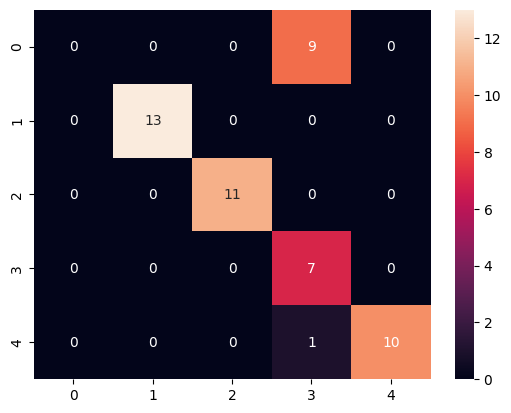

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=model_MFCC.predict(XVal)

y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredic,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

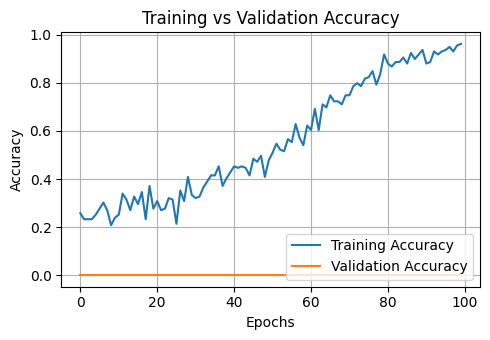

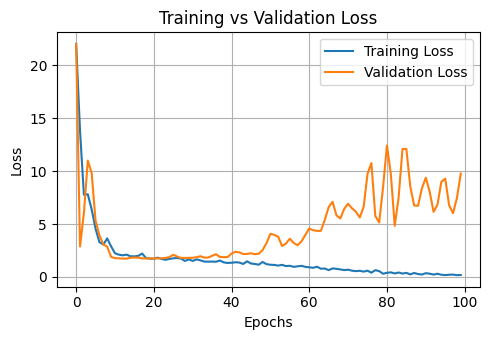

In [ ]:
import matplotlib.pyplot as plt

# Visualización de la precisión del modelo durante el entrenamiento
plt.figure(figsize=(5,3.5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)  # Agrega una cuadrícula para mejor visualización
plt.tight_layout()  # Ajusta el layout para que todo se vea bien
plt.show()

print("")

# Visualización de la pérdida del modelo durante el entrenamiento
plt.figure(figsize=(5,3.5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)  # Agrega una cuadrícula para mejor visualización
plt.tight_layout()  # Ajusta el layout para que todo se vea bien
plt.show()
